# ACHR_3 Analysis Notebook

In [14]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import scipy
import pandas as pd
import tdt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

import hypnogram as hp
import kd_analysis.main.kd_utils as kd
import kd_analysis.main.kd_plotting as kp
import neurodsp.plts.utils as dspu
import sleep_score_for_me.v1.ssfm_v1 as ss
import sleep_score_for_me.utils.ssfm_utils as ssu

bp_def = dict(delta=(1.5, 4), theta=(4, 8), sigma = (11, 16), beta = (13, 20), low_gamma = (40, 55), high_gamma = (65, 80), omega=(300, 700))

kd_ref = {}
kd_ref['echans'] = [1,2]
kd_ref['fchans']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
kd_ref['analysis_root'] = Path('/Volumes/opto_loc/Data/ACHR_PROJECT_MATERIALS/ACHR_3/ACHR_3-analysis-data')
kd_ref['tank_root'] = Path('/Volumes/opto_loc/Data/ACHR_3/ACHR_3_TANK')

In [2]:
#Pulse times and numbers for calibration experiment on 12/5/21
cal_pulse_times = [(0, 0),
 (1, 36.5201408),
 (2, 395.50402560000003),
 (3, 490.70768128000003),
 (4, 566.81271296),
 (5, 706.79146496),
 (6, 830.4766976),
 (7, 923.4967347200001),
 (8, 1028.20081664),
 (9, 1110.9107712),
 (10, 1327.42586368),
 (11, 1545.248768),
 (12, 1675.74687744),
 (13, 1883.81134848),
 (14, 1932.29529088)]

# Paths, Definitions

In [3]:
pth_x1_control = '/Volumes/opto_loc/Data/ACHR_3/ACHR_3_TANK/ACHR_3-exp1-control'
pth_x1_control_bl = '/Volumes/opto_loc/Data/ACHR_3/ACHR_3_TANK/ACHR_3-exp1-control-bl'
pth_x2 = '/Volumes/opto_loc/Data/ACHR_3/ACHR_3_TANK/ACHR_3-exp2'
pth_x2_bl = '/Volumes/opto_loc/Data/ACHR_3/ACHR_3_TANK/ACHR_3-exp2-bl'

a3x1 = {}
a3x2 = {}

# Exp. #1 Analysis

In [3]:
#Load data
a3x1['ctrl_e'], a3x1['ctrl_espg'] = kd.get_data_spg(pth_x1_control, store='EEGr', t1=0, t2=42300, channel=kd_ref['echans'])
a3x1['ctrl_f'], a3x1['ctrl_fspg'] = kd.get_data_spg(pth_x1_control, store='LFP_', t1=0, t2=42300, channel=kd_ref['fchans'])

read from t=0s to t=42444.34s
Using 1525.8789 Hz as SEV sampling rate for EEGr
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset


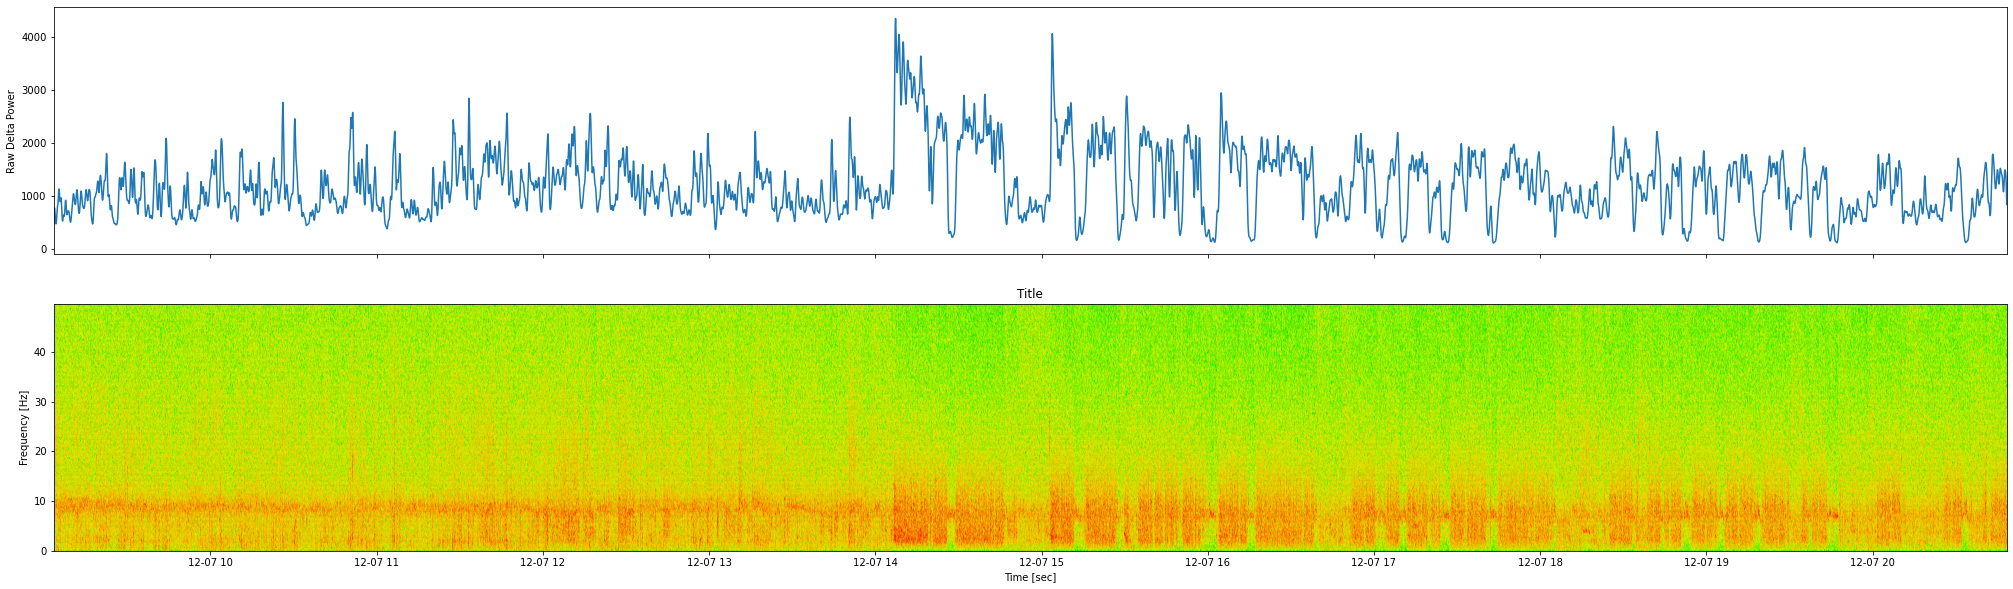

In [5]:
# Check on the control experiment rebound
b, s = kp.plot_bp_and_spectro(a3x1['ctrl_espg'], chan=2, hyp=None, bp_def=bp_def, band='delta')

# Exp. #2 Analysis

In [4]:
#Load data
a3x2['e'], a3x2['espg'] = kd.get_data_spg(pth_x2, store='EEGr', t1=0, t2=42300, channel=kd_ref['echans'])
a3x2['ebl'], a3x2['ebl_spg'] = kd.get_data_spg(pth_x2_bl, store='EEGr', t1=0, t2=43200, channel=kd_ref['echans'])

a3x2['f'], a3x2['fspg'] = kd.get_data_spg(pth_x2, store='LFP_', t1=0, t2=42300, channel=kd_ref['fchans'])
a3x2['fbl'], a3x2['fbl_spg'] = kd.get_data_spg(pth_x2_bl, store='LFP_', t1=0, t2=43200, channel=kd_ref['fchans'])

read from t=0s to t=43239.67s
Using 1525.8789 Hz as SEV sampling rate for EEGr
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
read from t=0s to t=44076.77s
Using 1525.8789 Hz as SEV sampling rate for EEGr
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
read from t=0s to t=43239.67s
Using 3051.7578 Hz as SEV sampling rate for LFP_
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
read from t=0s to t=44076.77s
Using 3051.7578 Hz as SEV sampling rate for LFP_
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset


In [5]:
def t2dt(times, start_time):
    dt = np.empty(0)
    for time in times:
        time_delta = pd.to_timedelta(time, unit='seconds')
        datetime = time_delta + start_time
        dt = np.append(dt, datetime)
    return dt

In [6]:
st = np.datetime64('2021-12-15T09:04:33.999993880')
times = [1268, 19313]
las = t2dt(times, start_time=st)

In [16]:
%matplotlib widget
band='delta'
for chan in [1, 3, 5, 7]:
    b, s = kp.plot_bp_and_spectro(a3x2['fspg'], chan=chan, hyp=None, bp_def=bp_def, band=band, fig_size=(25,10))
    b.axvspan(
        las[0],
        las[1],
        alpha=0.3,
        color='cornflowerblue',
        zorder=1000,
        ec="none",
    )
    b.set_title('Delta Power, LFP-'+str(chan))
    b.set_ylim(0, 75000)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
%matplotlib widget
band='delta'
for chan in [1, 3, 5, 11, 14, 16]:
    b, s = kp.plot_bp_and_spectro(a3x2['fspg'], chan=chan, hyp=None, bp_def=bp_def, band=band, fig_size=(25,10))
    b.axvspan(
        las[0],
        las[1],
        alpha=0.3,
        color='cornflowerblue',
        zorder=1000,
        ec="none",
    )
    b.set_title('Delta Power, LFP-'+str(chan))
    b.set_ylim(0, 230000)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
d = 86400
day = pd.to_timedelta(d, unit='seconds')

In [11]:
%matplotlib widget
band='delta'
for chan in [1, 3, 5, 11, 14, 16]:
    b, s = kp.plot_bp_and_spectro(a3x2['fbl_spg'], chan=chan, hyp=None, bp_def=bp_def, band=band, fig_size=(25,10))
    b.axvspan(
        (las[0]-day),
        (las[1]-day),
        alpha=0.3,
        color='pink',
        zorder=1000,
        ec="none",
    )
    b.set_title('Baseline Delta Power, LFP-'+str(chan))
    b.set_ylim(0, 230000)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
band='delta'
for chan in [1,2]:
    b, s = kp.plot_bp_and_spectro(a3x2['espg'], chan=chan, hyp=None, bp_def=bp_def, band=band, fig_size=(25,10))
    b.axvspan(
        las[0],
        las[1],
        alpha=0.3,
        color='cornflowerblue',
        zorder=1000,
        ec="none",
    )
    b.set_title('Delta Power, EEG-'+str(chan))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

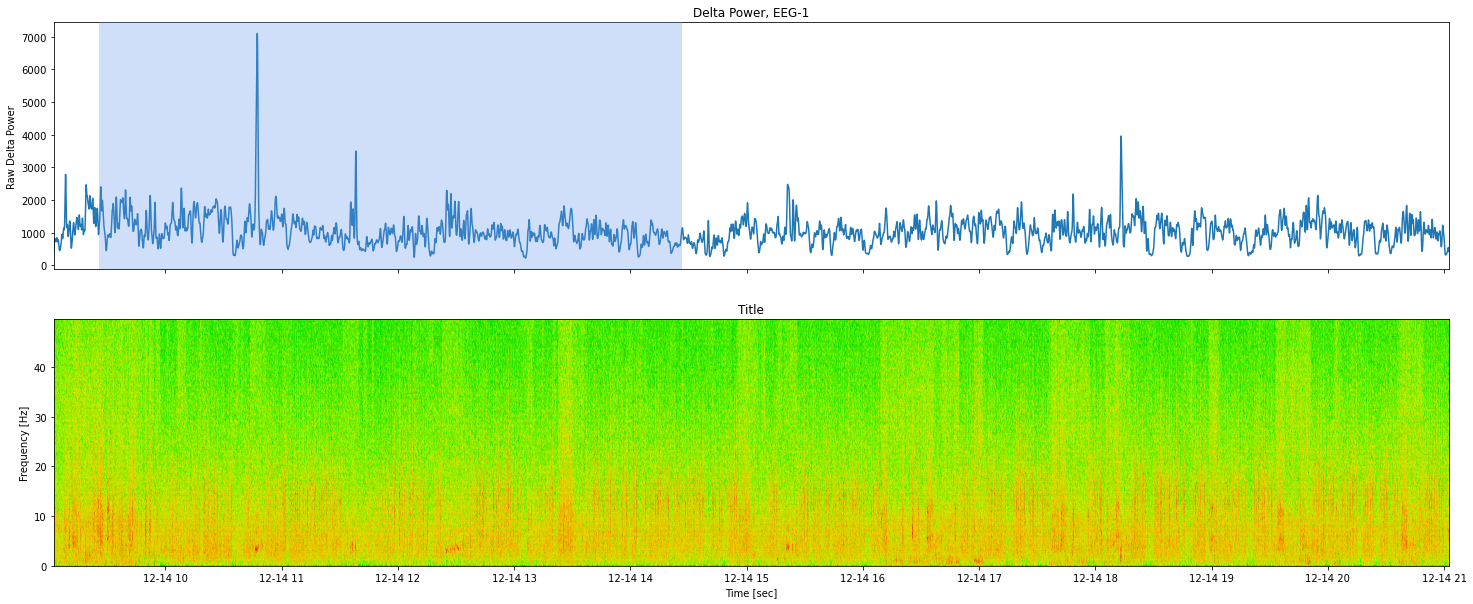

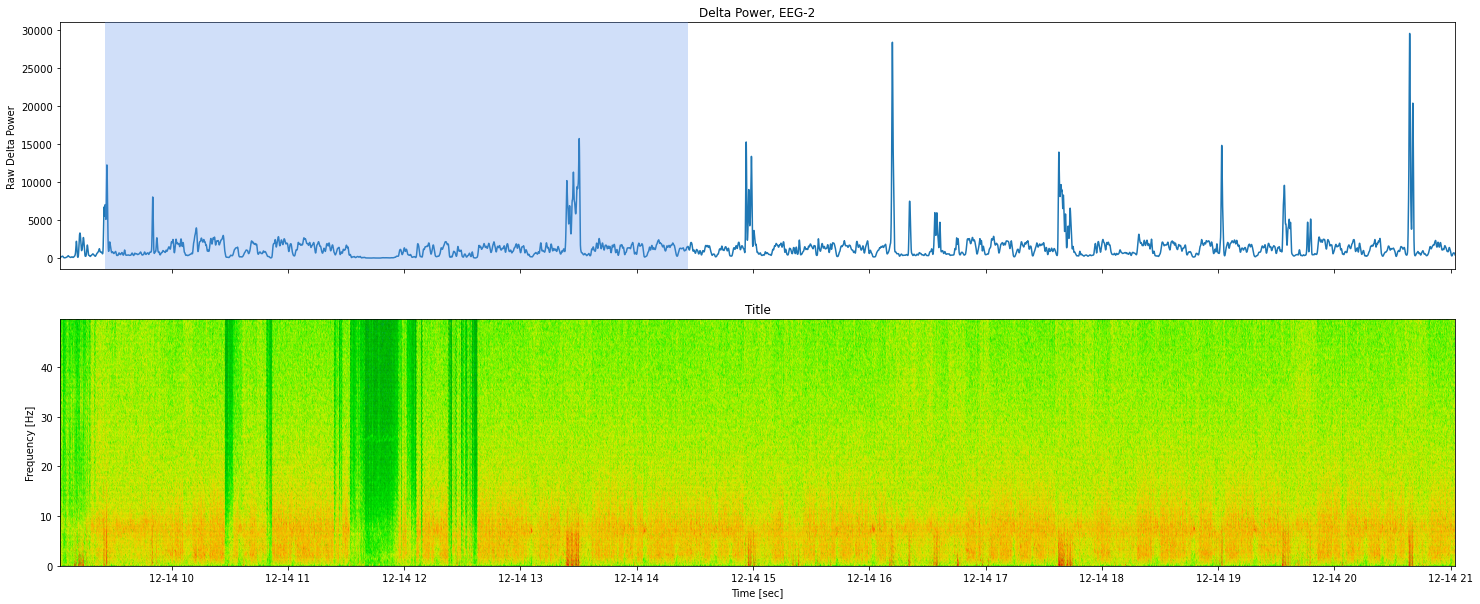

In [15]:
plt.close('all')
band='delta'
for chan in [1,2]:
    b, s = kp.plot_bp_and_spectro(a3x2['ebl_spg'], chan=chan, hyp=None, bp_def=bp_def, band=band, fig_size=(25,10))
    b.axvspan(
        las[0]-day,
        las[1]-day,
        alpha=0.3,
        color='cornflowerblue',
        zorder=1000,
        ec="none",
    )
    b.set_title('Delta Power, EEG-'+str(chan))